In [5]:
# import required python packages
%matplotlib inline
import numpy as np
from matplotlib  import cm
import matplotlib.pyplot as plt
import matplotlib.mlab as ml

In [6]:
# set scan rate for DE7 output files
f = open('results.txt', 'r')
x = []
y = []
z = []
zmin = 1.0e10
for line in f:
    columns = line.split()
    x.append(float(columns[0]))
    y.append(float(columns[1]))
    z.append(float(columns[2]))
    if(z[-1]<zmin):
        zmin = z[-1]
        xAtMin = x[-1]
        yAtMin = y[-1]
xplotmax = max(x)
yplotmax = max(y)
xplotmin = min(x)
yplotmin = min(y)

In [7]:
print 'Best fit: ',xAtMin, yAtMin, zmin

Best fit:  0.01 2.4e-05 5.15637779581e-08


In [8]:
bufFactor = 100.
bufX = (xplotmax - xplotmin)/bufFactor
bufY = (yplotmax - yplotmin)/bufFactor

Used bash:

    sort -k1,1n -k2,2n results.txt > temp.txt


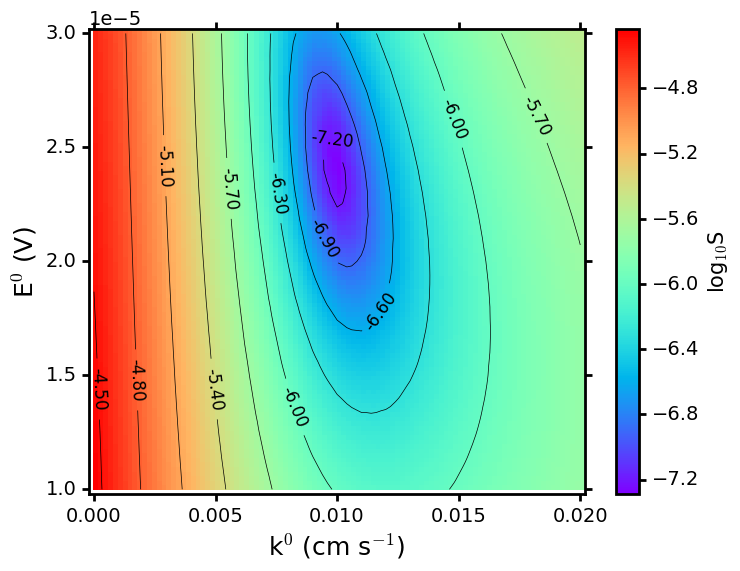

In [9]:
ny, nx = 100, 100
deltax = (xplotmax - xplotmin)/float(nx)
deltay = (yplotmax - yplotmin)/float(ny)
xmin = xplotmin-bufX
xmax = xplotmax+bufX
ymin = yplotmin-bufY
ymax = yplotmax+bufY
xi = np.arange(xmin-bufX, xmax+bufX, deltax)
yi = np.arange(ymin-bufY, ymax+bufY, deltay)
zlog = np.log10(z)
#zi = ml.griddata(x, y, zlog, xi, yi, interp='nn') # 'nn' for incomplete data; 'linear' if complete
zi = ml.griddata(x, y, zlog, xi, yi, interp='linear') # 'nn' for incomplete data; 'linear' if complete

plt.figure(figsize=(8,6),dpi=100)
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.minor.width'] = 2
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))
CS = plt.contour(xi, yi, zi, 10, linewidths = 0.5, colors = 'k')
# Define a class that forces representation of float to look a certain way
# This remove trailing zero so '1.0' becomes '1'
class nf(float):
    def __repr__(self):
        str = '%.2f' % (self.__float__(),)
        if str[-1] == '0':
            return '%.2f' % self.__float__()
        else:
            return '%.2f' % self.__float__()

# Recast levels to new class
CS.levels = [nf(val) for val in CS.levels]

# Label levels with specially formatted floats
if plt.rcParams["text.usetex"]:
    fmt = r'%r'
else:
    fmt = '%r'
plt.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=12)
#plt.clabel(CS, inline=1, fontsize=10)
plt.pcolormesh(xi, yi, zi, cmap = plt.get_cmap('rainbow'))
plt.colorbar().set_label(label='log$_{10}$S',size=15)
# lit values
plt.scatter(0.0115, 0.217, marker = 'o', c = 'white', s = 100, zorder = 10)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xlabel("k$^0$ (cm s$^{-1}$)",fontsize=18)
plt.ylabel("E$^0$ (V)",fontsize=18)
#plt.set_label("Test")
plt.savefig("output.pdf")
plt.show()

Notes
---

Best fit from paper is $E_0$ = 0.217 V and $k_s = 0.0115$ cm/s.